In [2]:
import pandas as pd
import numpy as np
import os



meta = pd.read_csv("./sample.csv", sep=";")

images_names = os.listdir("./SAMPLE/")
g_images_names = [name for name in images_names if name.endswith("g.csv")]
ids = [name.split("-")[0] for name in g_images_names]



from scipy.ndimage.interpolation import zoom

images = []
masses = []
for i in range(0,len(ids)): 
    image = pd.read_csv(os.path.abspath("./SAMPLE/" + g_images_names[i]), sep=',', header=None)
    image = zoom(image, 200/image.shape[1])
    images.append(image)
    
    
    mass = meta.loc[meta['SDSS_ID']== int(ids[i]), 'logMstar']
    mass = mass.values
    mass = mass.tolist()
    masses = masses + mass
    

masses = np.array(masses)
images = np.array(images)

split = 0.9
i_train_end = int(split * len(masses))
i_train = [i for i in range(0, i_train_end, 1)]
i_val = [i for i in range(i_train_end, len(masses) + 1, 1)]

y_train = masses[i_train[0]:i_train[-1]]
y_val = masses[i_val[0]:i_val[-1]]

x_train = images[i_train[0]:i_train[-1]]
x_val = images[i_val[0]:i_val[-1]]

In [3]:
x_train = x_train.reshape(x_train.shape[0], 1, 200, 200)
x_val = x_val.reshape(x_val.shape[0], 1, 200, 200)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
from ipykernel import kernelapp as app
from keras import optimizers

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [13]:
batch_size  = 100



model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(1, 200, 200),
                 padding='same', activation='relu'))
model.add(Flatten())

model.add(Dense(1, activation='relu'))


rmsprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.001)

model.compile(optimizer=rmsprop, loss='mse')


hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=batch_size)

Train on 46 samples, validate on 6 samples
Epoch 1/20
46/46 [==============================] - 0s - loss: 110.2621 - val_loss: 102.6957
Epoch 2/20
46/46 [==============================] - 0s - loss: 90.2920 - val_loss: 80.7182
Epoch 3/20
46/46 [==============================] - 0s - loss: 63.2926 - val_loss: 56.5154
Epoch 4/20
46/46 [==============================] - 0s - loss: 44.1729 - val_loss: 39.5617
Epoch 5/20
46/46 [==============================] - 0s - loss: 30.2568 - val_loss: 29.8766
Epoch 6/20
46/46 [==============================] - 0s - loss: 22.2198 - val_loss: 26.2155
Epoch 7/20
46/46 [==============================] - 0s - loss: 17.9023 - val_loss: 24.7951
Epoch 8/20
46/46 [==============================] - 0s - loss: 15.5833 - val_loss: 24.2303
Epoch 9/20
46/46 [==============================] - 0s - loss: 14.1109 - val_loss: 23.8751
Epoch 10/20
46/46 [==============================] - 0s - loss: 13.0445 - val_loss: 23.4728
Epoch 11/20
46/46 [=========================

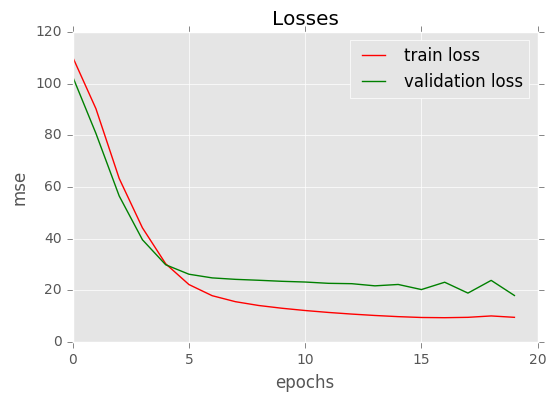

In [16]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, ax = plt.subplots()
ax.set_title('Losses')
ax.plot(hist.epoch, hist.history.get('loss'), label = 'train loss', color="red")
ax.plot(hist.epoch, hist.history.get('val_loss'),  label = 'validation loss', color="green")
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('mse')
plt.show()

In [15]:
predictions = model.predict(x_test, batch_size=batch_size, verbose=0)
subm_dict = {'logMstar_predictions' : predictions,
'SDSS_ID' : testIDs}
subm_df = pd.DataFrame(subm_dict)
subm_df.to_csv("./Submission_The_Juniors.csv", index=False)

NameError: name 'x_test' is not defined